In [31]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image
from function import *

%matplotlib inline

resource_path = "../Resource/"

***Exercise 1***

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19804\2458756574.py:1: SyntaxWarning: invalid escape sequence '\S'
  img_lena = cv2.imread("D:\Study\School\OpenCV\CS-K49-IPCV_LAB\Resource\images_lab2\lena.png",cv2.IMREAD_GRAYSCALE)


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

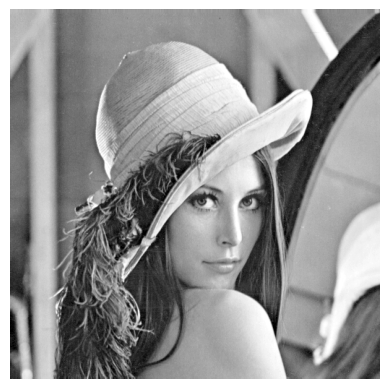

In [32]:
img_lena = cv2.imread("D:\Study\School\OpenCV\CS-K49-IPCV_LAB\Resource\images_lab2\lena.png",cv2.IMREAD_GRAYSCALE)

plt.imshow(img_lena, cmap="gray")
plt.axis("off")
# print(img_lena)

***Exercise 2***

(np.float64(-0.5), np.float64(513.5), np.float64(513.5), np.float64(-0.5))

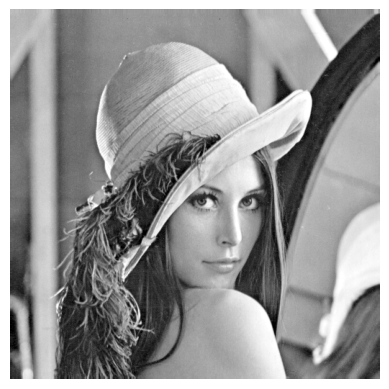

In [33]:
img_lena2= padding(img_lena,1)

plt.imshow(img_lena2, cmap= "gray")
plt.axis("off")

***Exercise 3***

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

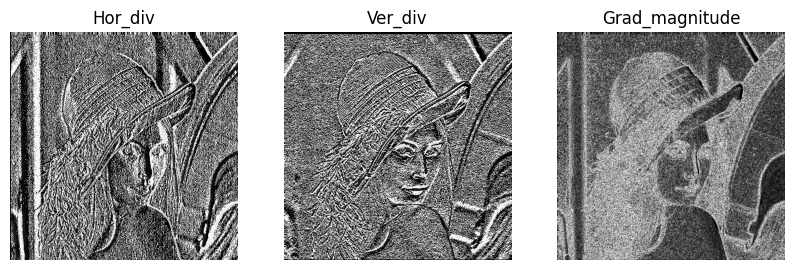

In [34]:
lena_Hor_div = hor_div(img_lena2,img_lena) #--> phương ngang
lena_Ver_div = ver_div(img_lena2,img_lena) #--> phương dọc
lenaGrad_magnitude = gradient_magnitude(lena_Hor_div,lena_Ver_div) #độ lớn của vector gradient

plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
plt.imshow(lena_Hor_div, cmap="gray")
plt.title("Hor_div")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(lena_Ver_div, cmap="gray")
plt.title("Ver_div")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(lenaGrad_magnitude, cmap="gray")
plt.title("Grad_magnitude")
plt.axis("off")

***Exercise 4***

In [53]:
#file output
filename = 'result\Ex4_Lab2.mp4'
fps = 25
frame_size = (img_lena.shape[1], img_lena.shape[0])
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec video
video = cv2.VideoWriter(filename, fourcc, fps, frame_size)

for i in range(10,241,10):
    video.write(cv2.cvtColor(binary_segmentation(lenaGrad_magnitude, i),cv2.COLOR_GRAY2RGB))

video.release()

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19804\214704181.py:1: SyntaxWarning: invalid escape sequence '\E'
  filename = 'result\Ex4_Lab2.mp4'


***Exercise 5***

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

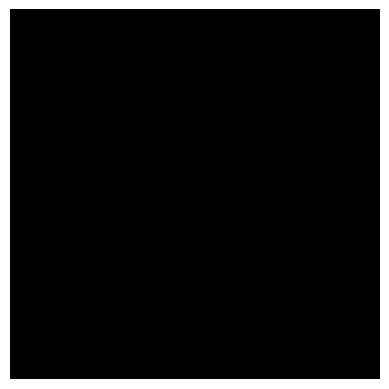

In [36]:
plt.imshow(binary_segmentation(lenaGrad_magnitude,20), cmap= "gray")
plt.axis("off")

***Exercise 6***

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

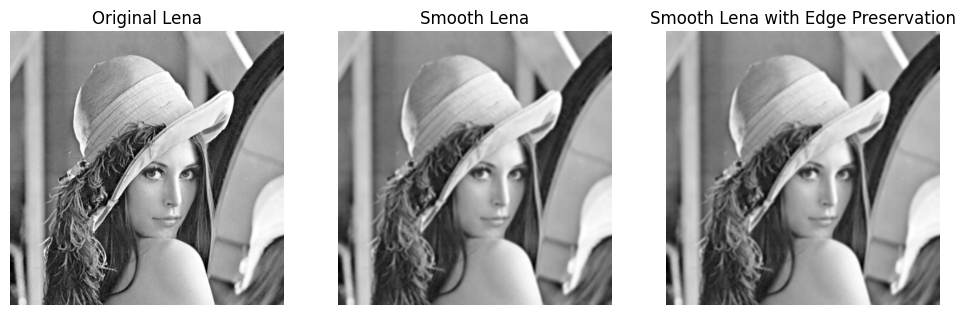

In [37]:
smooth_lena = cv2.GaussianBlur(img_lena, (5, 5), 100)
# (5, 5): Kích thước của kernel Gaussian (ma trận lọc)
# 100: Độ lệch chuẩn (sigma) cho Gaussian Blur

bin_grad_magnitude = binary_segmentation(lenaGrad_magnitude,50)
# 50 --> phân đoạn nhị phân
# >50 --> gán 255 (white)
# <50 --> gán 0 (black)

# Sao chép ảnh làm mượt và giữ lại các cạnh từ ảnh gốc
smooth_lena_with_edge_preservation = smooth_lena.copy()
smooth_lena_with_edge_preservation[bin_grad_magnitude == 255] = img_lena[bin_grad_magnitude == 255]
# Tại các vị trí cạnh (các pixel có giá trị 255 trong bin_grad_magnitude), thay thế giá trị từ ảnh làm mượt bằng giá trị từ ảnh gốc (img_lena)
# --> giữ cạnh nét

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Lena")
plt.imshow(img_lena, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Smooth Lena")
plt.imshow(smooth_lena, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Smooth Lena with Edge Preservation")
plt.imshow(smooth_lena_with_edge_preservation, cmap="gray")
plt.axis("off")

***Exercise 7***

***Canny***

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

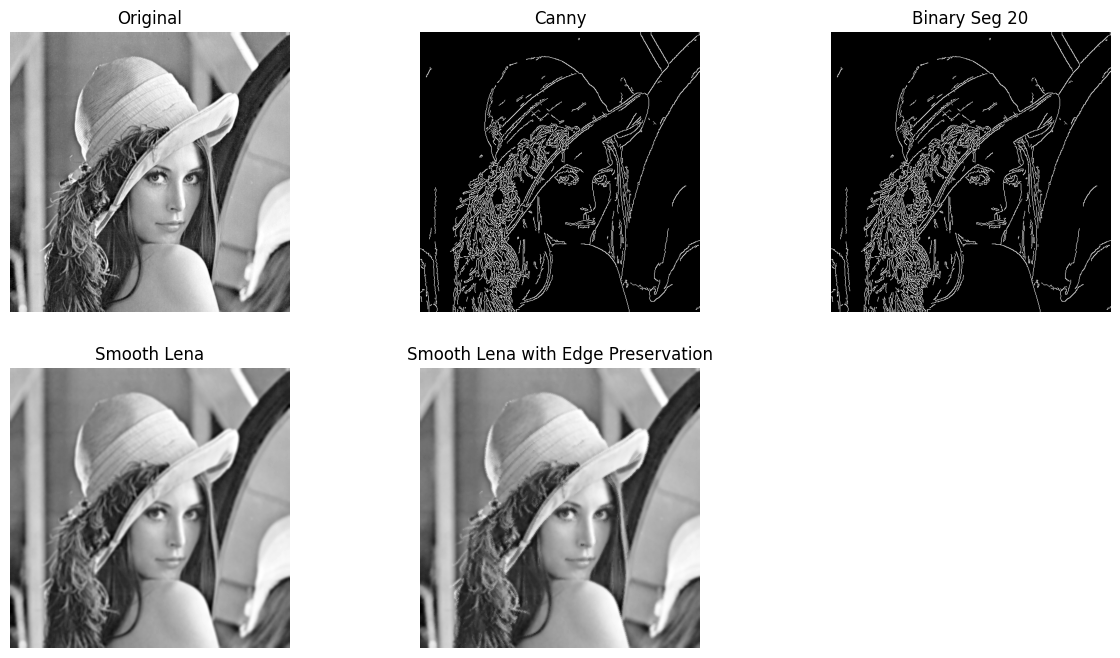

In [38]:
start = time.time()

#Canny Edge Detection để phát hiện các cạnh trong ảnh Lena
grad_magnitude_canny = cv2.Canny(img_lena,100,200)
# Ngưỡng dưới = 100, ngưỡng trên = 200
# Các pixel với gradient > 200 --> cạnh 
# 100 < pixel với gradient < 200 --> check nếu kết nối với cạnh mạnh
cannyRuntime = time.time() - start

bin_grad_canny = binary_segmentation(grad_magnitude_canny,20) #ngưỡng 20

smooth_lena_with_edge_preservation = smooth_lena.copy()
smooth_lena_with_edge_preservation[bin_grad_canny == 255] = img_lena[bin_grad_canny == 255]

plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(img_lena, cmap="gray")
plt.title("Original");plt.axis("off")
plt.subplot(2, 3, 2)
plt.imshow(grad_magnitude_canny, cmap="gray")
plt.title("Canny");plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(grad_magnitude_canny, cmap="gray")
plt.title("Binary Seg 20")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(smooth_lena, cmap="gray")
plt.title("Smooth Lena")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(smooth_lena_with_edge_preservation, cmap="gray")
plt.title("Smooth Lena with Edge Preservation")
plt.axis("off")

***Sobel***

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

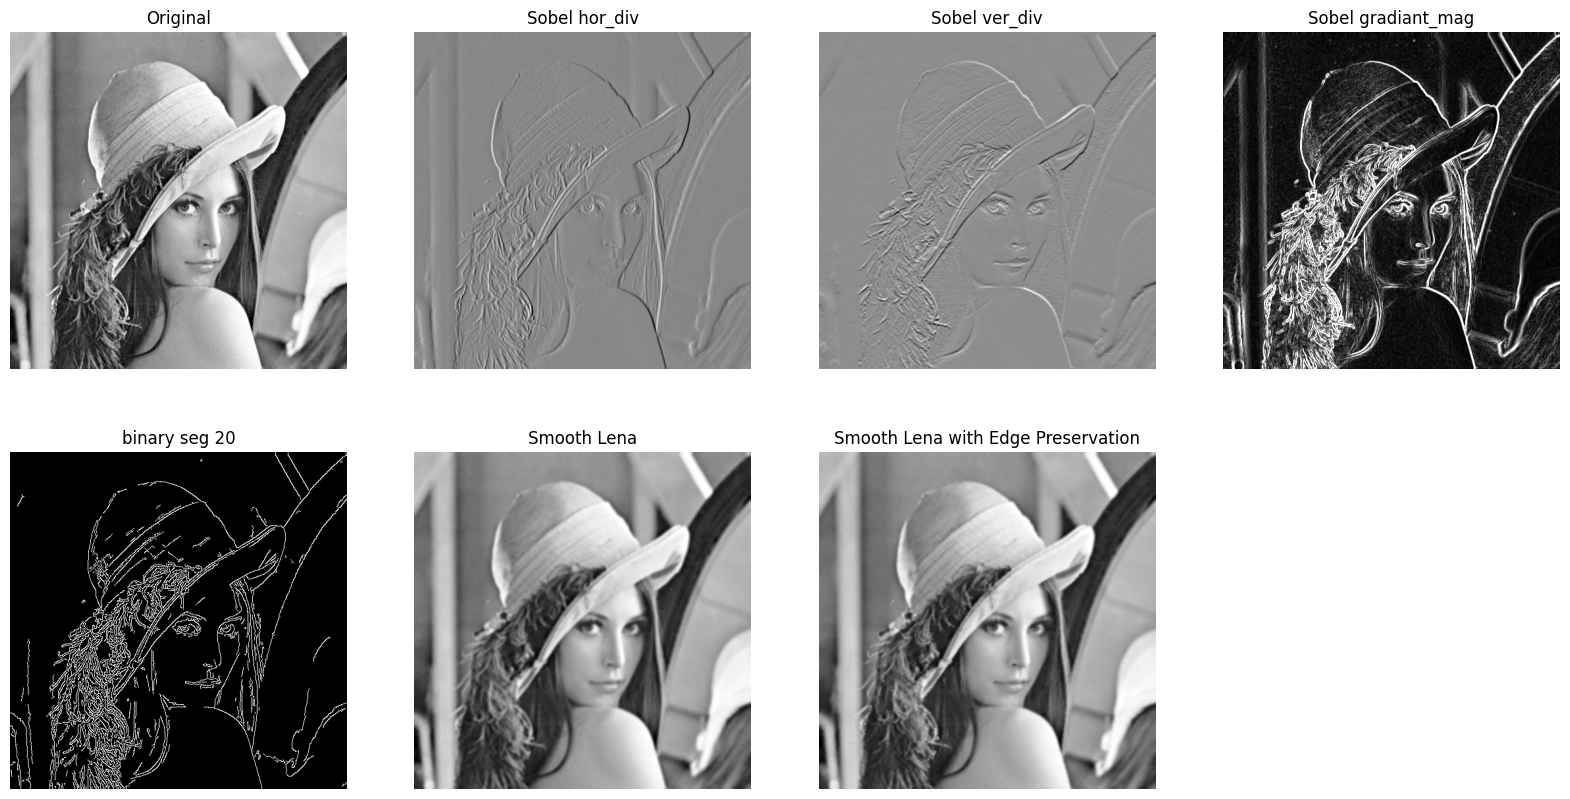

In [39]:
start = time.time()

# Tính gradient theo phương ngang sử dụng Sobel với kernel dọc (dx=1, dy=0)
sobel_Hor_div = cv2.Sobel(img_lena, cv2.CV_64F, 1, 0, ksize=3)  
# cv2.CV_64F: datatype for gradient (64-bit float)
# ksize=3 --> size kernel 3x3

sobel_Ver_div = cv2.Sobel(img_lena, cv2.CV_64F, 0, 1, ksize=3) #(dx=0, dy=1)  

grad_magnitude_sobel = gradient_magnitude(sobel_Hor_div,sobel_Ver_div)

sobelRuntime = time.time() - start

bin_grad_sobel = binary_segmentation(grad_magnitude_canny,20)

smooth_lena_with_edge_preservation = smooth_lena.copy()
smooth_lena_with_edge_preservation[bin_grad_sobel == 255] = img_lena[bin_grad_sobel == 255]

plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1);plt.imshow(img_lena, cmap="gray");plt.title("Original");plt.axis("off")
plt.subplot(2, 4, 2);plt.imshow(sobel_Hor_div, cmap="gray");plt.title("Sobel hor_div");plt.axis("off")
plt.subplot(2, 4, 3);plt.imshow(sobel_Ver_div, cmap="gray");plt.title("Sobel ver_div");plt.axis("off")
plt.subplot(2, 4, 4);plt.imshow(grad_magnitude_sobel, cmap="gray");plt.title("Sobel gradiant_mag");plt.axis("off")

plt.subplot(2, 4, 5);plt.imshow(bin_grad_sobel, cmap="gray");plt.title("binary seg 20");plt.axis("off")
plt.subplot(2, 4, 6);plt.imshow(smooth_lena, cmap="gray");plt.title("Smooth Lena");plt.axis("off")
plt.subplot(2, 4, 7);plt.imshow(smooth_lena_with_edge_preservation, cmap="gray");plt.title("Smooth Lena with Edge Preservation");plt.axis("off")

***Prewitt***

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

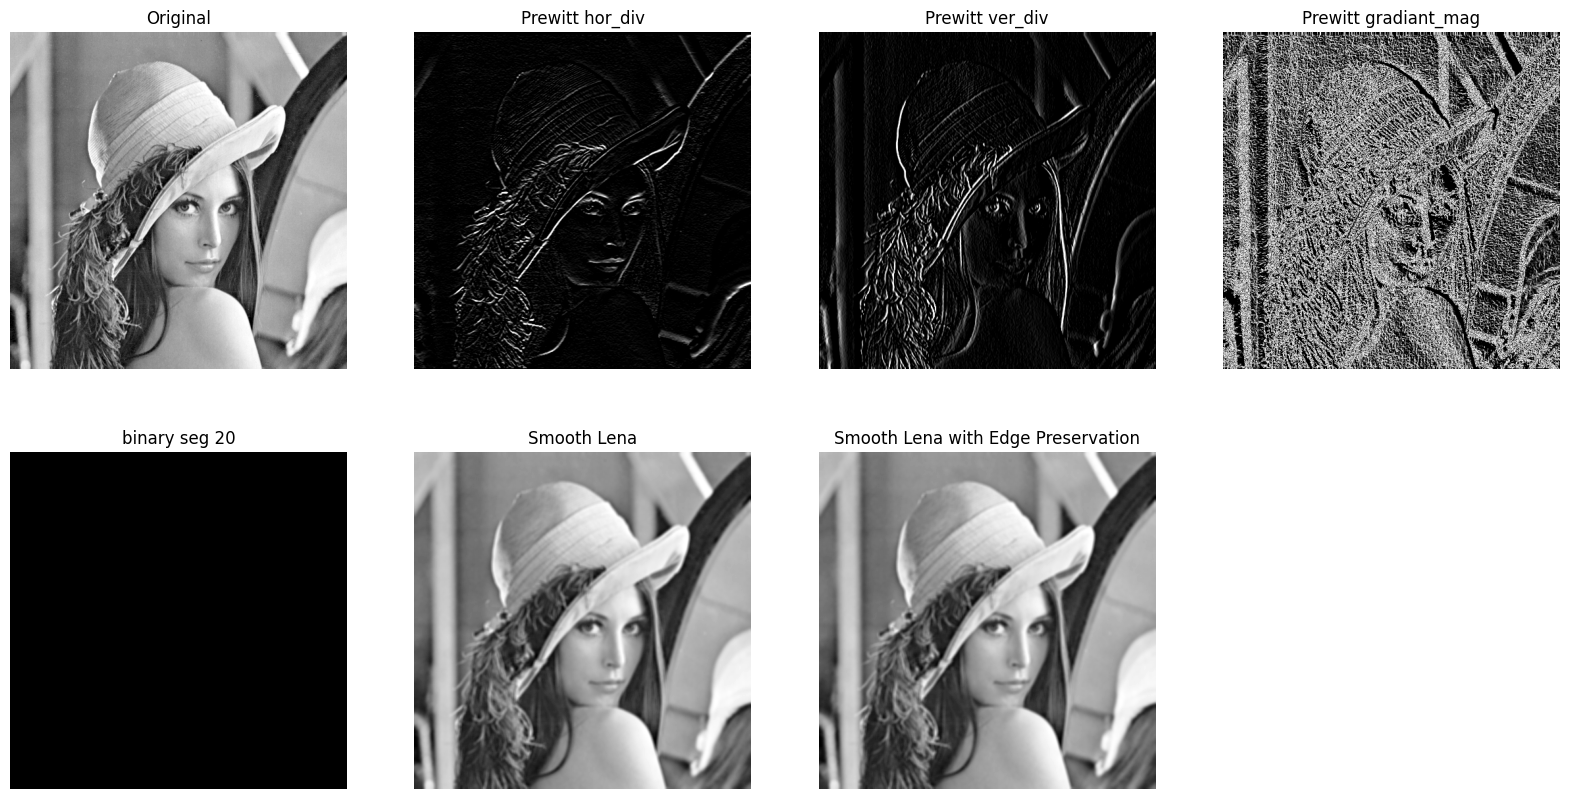

In [40]:
start = time.time()
kernelHor_div = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #--> kernel theo phương ngang
kernelVer_div = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) #--> kernel theo phương dọc

#áp dụng bộ lọc Prewitt --> gradient
prewittHor_div = cv2.filter2D(img_lena, -1, kernelHor_div)
prewittVer_div = cv2.filter2D(img_lena, -1, kernelVer_div) 

grad_magnitude_prewitt = gradient_magnitude(prewittHor_div,prewittVer_div)
prewittRuntime = time.time() - start

bin_grad_prewitt = binary_segmentation(grad_magnitude_prewitt,20)

smooth_lena_with_edge_preservation = smooth_lena.copy()
smooth_lena_with_edge_preservation[bin_grad_prewitt == 255] = img_lena[bin_grad_prewitt == 255]

plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1);plt.imshow(img_lena, cmap="gray");plt.title("Original");plt.axis("off")
plt.subplot(2, 4, 2);plt.imshow(prewittHor_div, cmap="gray");plt.title("Prewitt hor_div");plt.axis("off")
plt.subplot(2, 4, 3);plt.imshow(prewittVer_div, cmap="gray");plt.title("Prewitt ver_div");plt.axis("off")
plt.subplot(2, 4, 4);plt.imshow(grad_magnitude_prewitt, cmap="gray");plt.title("Prewitt gradiant_mag");plt.axis("off")

plt.subplot(2, 4, 5);plt.imshow(bin_grad_prewitt, cmap="gray");plt.title("binary seg 20");plt.axis("off")
plt.subplot(2, 4, 6);plt.imshow(smooth_lena, cmap="gray");plt.title("Smooth Lena");plt.axis("off")
plt.subplot(2, 4, 7);plt.imshow(smooth_lena_with_edge_preservation, cmap="gray");plt.title("Smooth Lena with Edge Preservation");plt.axis("off")

***Robert***

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

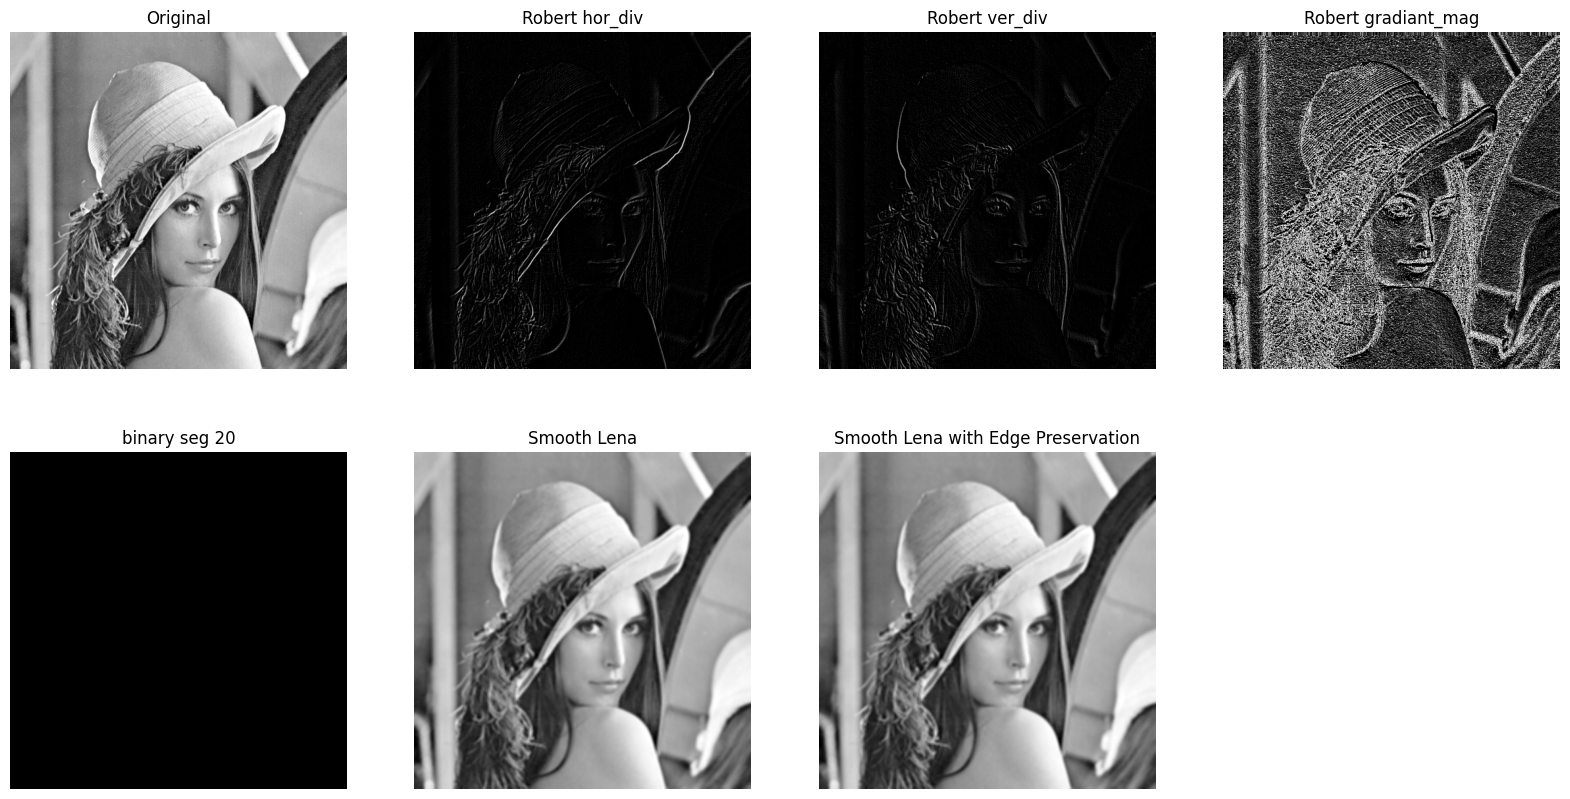

In [41]:
start = time.time()
kernelHor_div = np.array([[1, 0], [0, -1]]) 
kernelVer_div = np.array([[0, 1], [-1, 0]])  

robertsHor_div = cv2.filter2D(img_lena, -1, kernelHor_div)
robertsVer_div = cv2.filter2D(img_lena, -1, kernelVer_div)
grad_magnitude_robert = gradient_magnitude(robertsHor_div,robertsVer_div)
robertRuntime = time.time() - start

bin_grad_robert = binary_segmentation(grad_magnitude_robert,20)

smooth_lena_with_edge_preservation = smooth_lena.copy()
smooth_lena_with_edge_preservation[bin_grad_robert == 255] = img_lena[bin_grad_robert == 255]

plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1);plt.imshow(img_lena, cmap="gray");plt.title("Original");plt.axis("off")
plt.subplot(2, 4, 2);plt.imshow(robertsHor_div, cmap="gray");plt.title("Robert hor_div");plt.axis("off")
plt.subplot(2, 4, 3);plt.imshow(robertsVer_div, cmap="gray");plt.title("Robert ver_div");plt.axis("off")
plt.subplot(2, 4, 4);plt.imshow(grad_magnitude_robert, cmap="gray");plt.title("Robert gradiant_mag");plt.axis("off")

plt.subplot(2, 4, 5);plt.imshow(bin_grad_robert, cmap="gray");plt.title("binary seg 20");plt.axis("off")
plt.subplot(2, 4, 6);plt.imshow(smooth_lena, cmap="gray");plt.title("Smooth Lena");plt.axis("off")
plt.subplot(2, 4, 7);plt.imshow(smooth_lena_with_edge_preservation, cmap="gray");plt.title("Smooth Lena with Edge Preservation");plt.axis("off")

***Scharr***

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

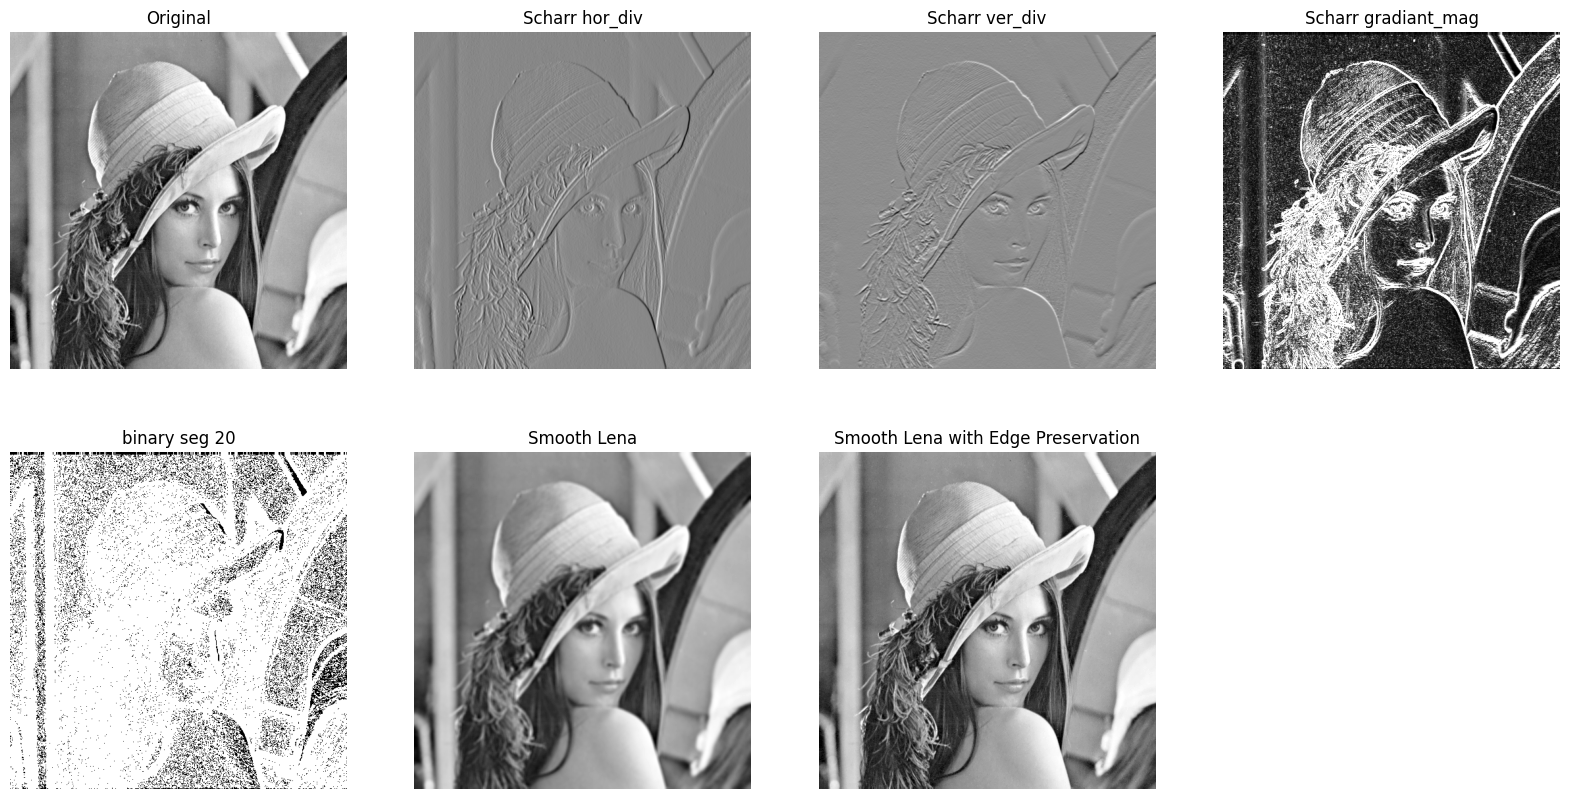

In [42]:
start = time.time()

scharr_Hor_div = cv2.Scharr(img_lena, cv2.CV_64F, 1, 0)  #dx = 1, dy = 0
scharr_Ver_div = cv2.Scharr(img_lena, cv2.CV_64F, 0, 1)  #dx = 0, dy = 1

grad_magnitude_scharr = gradient_magnitude(sobel_Hor_div,scharr_Ver_div)
scharrRuntime = time.time() - start

bin_grad_scharr = binary_segmentation(grad_magnitude_scharr,20)
smooth_lena_with_edge_preservation = smooth_lena.copy()
smooth_lena_with_edge_preservation[bin_grad_scharr == 255] = img_lena[bin_grad_scharr == 255]

plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1);plt.imshow(img_lena, cmap="gray");plt.title("Original");plt.axis("off")
plt.subplot(2, 4, 2);plt.imshow(scharr_Hor_div, cmap="gray");plt.title("Scharr hor_div");plt.axis("off")
plt.subplot(2, 4, 3);plt.imshow(scharr_Ver_div, cmap="gray");plt.title("Scharr ver_div");plt.axis("off")
plt.subplot(2, 4, 4);plt.imshow(grad_magnitude_scharr, cmap="gray");plt.title("Scharr gradiant_mag");plt.axis("off")

plt.subplot(2, 4, 5);plt.imshow(bin_grad_scharr, cmap="gray");plt.title("binary seg 20");plt.axis("off")
plt.subplot(2, 4, 6);plt.imshow(smooth_lena, cmap="gray");plt.title("Smooth Lena");plt.axis("off")
plt.subplot(2, 4, 7);plt.imshow(smooth_lena_with_edge_preservation, cmap="gray");plt.title("Smooth Lena with Edge Preservation");plt.axis("off")

***Laplacian***

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

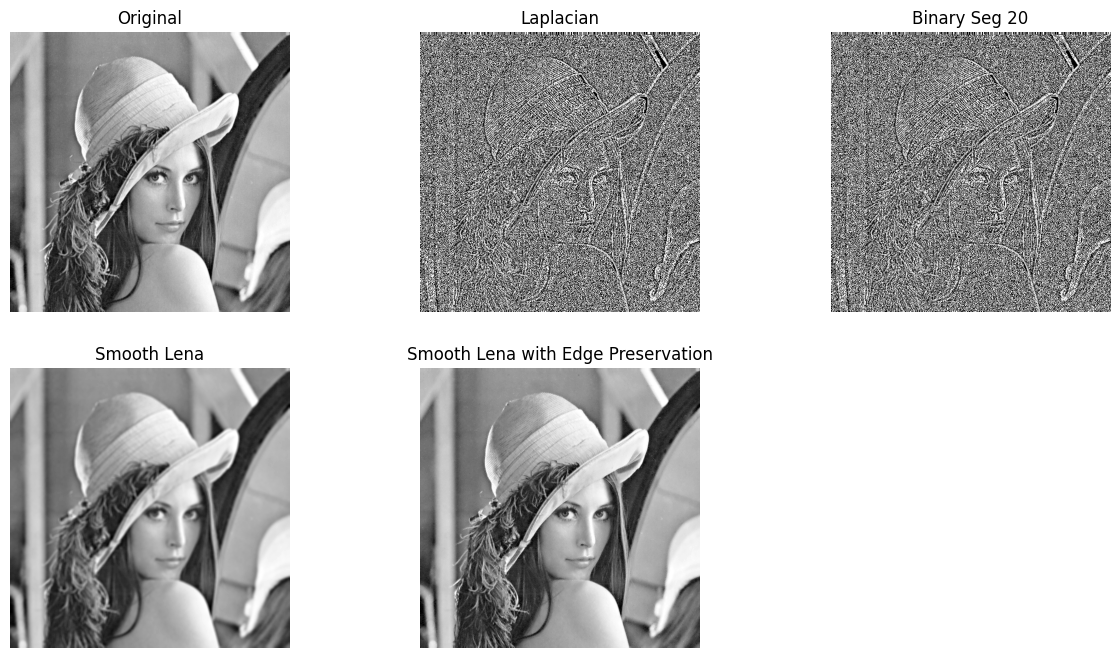

In [43]:
start = time.time()
grad_magnitude_laplacian = np.abs(cv2.Laplacian(img_lena, cv2.CV_64F).astype(np.uint8))
#Sử dụng toán tử Laplacian để tính gradient (biến đổi hai lần đạo hàm)
laplacianRuntime = time.time() - start

bin_grad_laplacian = binary_segmentation(grad_magnitude_laplacian,20)

smooth_lena_with_edge_preservation = smooth_lena.copy()
smooth_lena_with_edge_preservation[bin_grad_laplacian == 255] = img_lena[bin_grad_laplacian == 255]

plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1);plt.imshow(img_lena, cmap="gray");plt.title("Original");plt.axis("off")
plt.subplot(2, 3, 2);plt.imshow(grad_magnitude_laplacian, cmap="gray");plt.title("Laplacian");plt.axis("off")

plt.subplot(2, 3, 3);plt.imshow(grad_magnitude_laplacian, cmap="gray");plt.title("Binary Seg 20");plt.axis("off")
plt.subplot(2, 3, 4);plt.imshow(smooth_lena, cmap="gray");plt.title("Smooth Lena");plt.axis("off")
plt.subplot(2, 3, 5);plt.imshow(smooth_lena_with_edge_preservation, cmap="gray");plt.title("Smooth Lena with Edge Preservation");plt.axis("off")

***Exercise 8***

[0.0010001659393310547, 0.004223346710205078, 0.008893489837646484, 0.007443666458129883, 0.006002664566040039, 0.0021495819091796875]


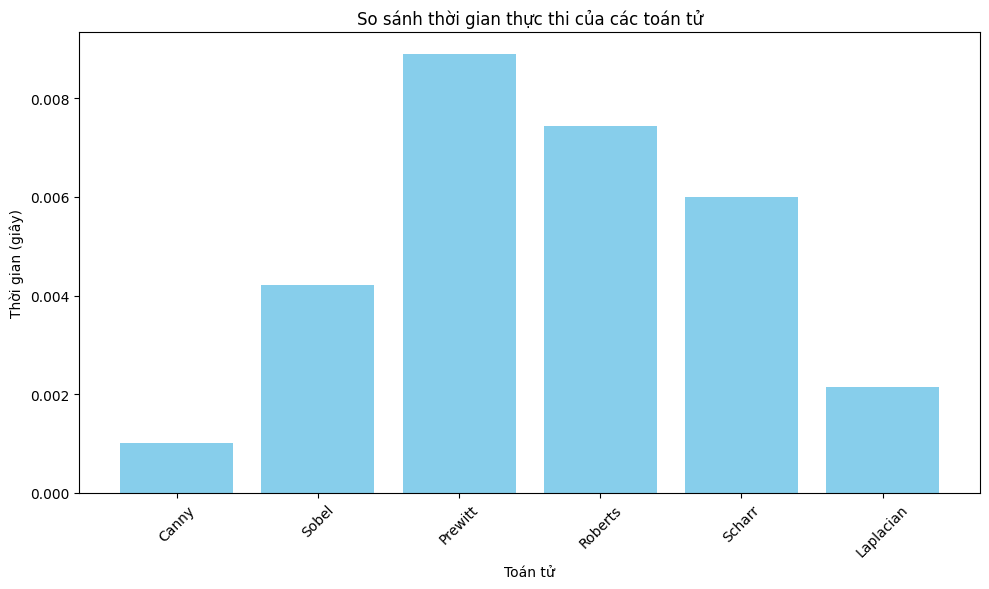

In [44]:
execution_times = [cannyRuntime,sobelRuntime,prewittRuntime,robertRuntime,scharrRuntime,laplacianRuntime]
print(execution_times)
operators = ['Canny','Sobel', 'Prewitt','Roberts', 'Scharr','Laplacian']

plt.figure(figsize=(10,6))
plt.bar(operators, execution_times, color='skyblue')
plt.title('So sánh thời gian thực thi của các toán tử')
plt.xlabel('Toán tử')
plt.ylabel('Thời gian (giây)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Canny, Sobel, Scharr, Laplacian: Tất cả đều có sẵn trong OpenCV, và bạn có thể dễ dàng áp dụng chúng bằng các hàm như cv2.Canny(), cv2.Sobel(), cv2.Scharr(), và cv2.Laplacian()***
***Prewitt và Robert: Những bộ lọc này không có sẵn trực tiếp trong OpenCV --> cv2.filter2D() với các kernel được xác định trước***
Canny sử dụng gradient và ngưỡng kép
Sobel và Scharr đạo hàm (gradient) trong hướng ngang và dọc --> phát hiện biên trong ảnh
Laplacian đạo hàm bậc 2 --> dùng để phát hiện các vùng có độ thay đổi nhanh (biên)
Prewitt và Robert là các bộ lọc phát hiện biên tương tự như Sobel --> kernel khác nhau

***Exercise 9***

In [ ]:
img_01 = cv2.imread(r"D:/Study/School/OpenCV/CS-K49-IPCV_LAB/Resource/images_lab2/unconnected.png", cv2.IMREAD_GRAYSCALE)
img_02 = cv2.imread(r"D:/Study/School/OpenCV/CS-K49-IPCV_LAB/Resource/images_lab2/connected.png", cv2.IMREAD_GRAYSCALE)

images = [img_01,img_02]

plt.figure(figsize=(4, 4))
for i in range(len(images)):
    plt.subplot(121+i)
    if all_components(images[i]) == 1:
        plt.title("Connected")
    else:
        plt.title("Unconnected")
    plt.imshow(images[i], cmap="gray")
    plt.axis("off")